In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

df = fetch_openml(data_id=1494, as_frame=True).frame

display(df.sample(5))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
975,4.214,3.4743,0,0,1,0,0,23.1,1,2,...,0,0,2,3.360,3.278,1,7.410,0,0,1
575,5.423,2.9683,4,0,2,0,8,35.3,0,6,...,6,4,6,4.751,3.308,2,10.384,0,2,1
195,4.347,3.4478,0,0,1,0,0,30.8,1,2,...,0,1,1,3.405,2.515,1,7.864,0,0,2
679,5.493,2.3368,0,0,0,1,0,38.5,2,0,...,0,0,0,3.662,1.708,0,8.011,0,0,1
776,4.835,2.8214,0,0,2,0,2,40.7,2,2,...,1,3,1,3.681,2.619,1,8.550,0,0,1


# 1.1 Convertir class a categorico 0 y 1

In [7]:
#Convertir la columna class a 0 y 1
df['Class'] = df['Class'].cat.rename_categories({'1': 0, '2': 1}).astype(int)
display(df.sample(5))


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
52,5.206,3.3847,0,0,1,0,0,30.8,1,2,...,0,2,0,3.470,2.167,1,8.295,0,0,1
87,4.982,2.8025,0,0,2,0,2,50.0,0,2,...,0,2,1,3.853,2.833,1,8.508,0,0,1
823,4.807,2.7734,2,0,0,0,0,26.3,0,0,...,0,0,0,4.094,2.019,2,8.760,0,0,0
144,4.618,4.7233,0,0,0,0,0,33.3,2,4,...,0,0,0,3.493,3.152,0,8.202,0,0,1
939,4.807,3.3506,2,0,1,0,3,42.9,0,0,...,3,2,2,4.049,2.580,1,8.863,0,2,0


# 1.2 Dividir en entrnamiento y prueba

In [8]:
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1.3 Escala los valores con StandardScaler.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2.1 Define un nombre de experimento con mlflow.set_experiment("nombre_experimento").

In [10]:
import mlflow

mlflow.set_experiment("mlflow-tracking-experiment")

<Experiment: artifact_location='file:///C:/Users/Isaac/Desktop/taller-mlflow-tracking/mlruns/104213516432782784', creation_time=1762190291116, experiment_id='104213516432782784', last_update_time=1762190291116, lifecycle_stage='active', name='mlflow-tracking-experiment', tags={'mlflow.experimentKind': 'custom_model_development'}>

*captura de el experimento en la interfaz de mlflow*

# 3.1 Entrena una regresión logística probando diferentes parámetros (C, max_iter, solver).

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import mlflow.sklearn

params = {
    'C': [0.1, 1, 10],
    'max_iter': [100, 200, 300],
    'solver': ['liblinear', 'lbfgs']
}


for C in params['C']:
    for max_iter in params['max_iter']:
        for solver in params['solver']:
            with mlflow.start_run() as run:
                lr = LogisticRegression(C=C, max_iter=max_iter, solver=solver)
                lr.fit(X_train, y_train)
                y_pred = lr.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred)
                recall = recall_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)
                mlflow.log_param('C', C)
                mlflow.log_param('max_iter', max_iter)
                mlflow.log_param('solver', solver)
                mlflow.log_metric('accuracy', accuracy)
                mlflow.log_metric('precision', precision)
                mlflow.log_metric('recall', recall)
                mlflow.log_metric('f1', f1)
                mlflow.sklearn.log_model(lr, name='model')
                print("Run ID:", run.info.run_id)
            print(f'Finished C={C}, max_iter={max_iter}, solver={solver}')
print("Experiment completed.")
    
    



2025/11/04 12:46:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: c9f2e8067bb84c0cb4f1a464a7f6bc22
Finished C=0.1, max_iter=100, solver=liblinear


c:\Users\Isaac\Desktop\taller-mlflow-tracking\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/11/04 12:46:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: c5bb7f9c1675439cbc1e8153ed464fcb
Finished C=0.1, max_iter=100, solver=lbfgs


2025/11/04 12:46:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: a3e17da1b6e54138acd1979292093cde
Finished C=0.1, max_iter=200, solver=liblinear


c:\Users\Isaac\Desktop\taller-mlflow-tracking\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/11/04 12:46:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: d2652f2d54db4aceb385facc84fb65a5
Finished C=0.1, max_iter=200, solver=lbfgs


2025/11/04 12:47:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: 2f46cf9277574516b3b032978364863e
Finished C=0.1, max_iter=300, solver=liblinear


2025/11/04 12:47:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: cfdf2990348d4e468fbd52c40ee46865
Finished C=0.1, max_iter=300, solver=lbfgs


2025/11/04 12:47:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: ce1fc4d910df4deba1b7c375dfd351e1
Finished C=1, max_iter=100, solver=liblinear


c:\Users\Isaac\Desktop\taller-mlflow-tracking\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/11/04 12:48:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: 5b0c98ac093c432b8f4b3b338d1eee5e
Finished C=1, max_iter=100, solver=lbfgs


2025/11/04 12:48:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: 63f5c521dc594e4f9dc797fae22a394c
Finished C=1, max_iter=200, solver=liblinear


c:\Users\Isaac\Desktop\taller-mlflow-tracking\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/11/04 12:48:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: 25d4d09b388f477a8f7aab6a6af5ffa9
Finished C=1, max_iter=200, solver=lbfgs


2025/11/04 12:48:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: 53696e8489a04718a164c8c968864630
Finished C=1, max_iter=300, solver=liblinear


c:\Users\Isaac\Desktop\taller-mlflow-tracking\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/11/04 12:49:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: 39a5b749c0114a0e9909291495fd357f
Finished C=1, max_iter=300, solver=lbfgs


2025/11/04 12:49:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\Isaac\Desktop\taller-mlflow-tracking\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Run ID: 2c32ed391ad6433ab467d74bcf543550
Finished C=10, max_iter=100, solver=liblinear


2025/11/04 12:49:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: 0daf159a95ff4daeaabff7f8a9986cb0
Finished C=10, max_iter=100, solver=lbfgs


2025/11/04 12:49:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: aa9afa1c90e14b91b61433de2f1f2677
Finished C=10, max_iter=200, solver=liblinear


c:\Users\Isaac\Desktop\taller-mlflow-tracking\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/11/04 12:50:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: ac018581475d48e98852e2280935005a
Finished C=10, max_iter=200, solver=lbfgs


2025/11/04 12:50:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: 5f0c366642a84f85b41a9337099892bc
Finished C=10, max_iter=300, solver=liblinear


c:\Users\Isaac\Desktop\taller-mlflow-tracking\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/11/04 12:50:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: ca771158da5b401a9c213ec9aee3b32c
Finished C=10, max_iter=300, solver=lbfgs
Experiment completed.


# Red Neuronal (TensorFlow/Keras)

2025/11/04 12:57:36 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Epoch 1/100


4/4 - 6s - 1s/step - accuracy: 0.6623 - auc: 0.5344 - loss: 0.6540 - val_accuracy: 0.6635 - val_auc: 0.6440 - val_loss: 0.6184
Epoch 2/100


4/4 - 0s - 71ms/step - accuracy: 0.6635 - auc: 0.5872 - loss: 0.6325 - val_accuracy: 0.6588 - val_auc: 0.6831 - val_loss: 0.6007
Epoch 3/100


4/4 - 0s - 82ms/step - accuracy: 0.6682 - auc: 0.6362 - loss: 0.6128 - val_accuracy: 0.6635 - val_auc: 0.7194 - val_loss: 0.5847
Epoch 4/100


4/4 - 0s - 78ms/step - accuracy: 0.6836 - auc: 0.6803 - loss: 0.5948 - val_accuracy: 0.6682 - val_auc: 0.7524 - val_loss: 0.5704
Epoch 5/100


4/4 - 0s - 99ms/step - accuracy: 0.6860 - auc: 0.7172 - loss: 0.5790 - val_accuracy: 0.6635 - val_auc: 0.7802 - val_loss: 0.5572
Epoch 6/100


4/4 - 1s - 129ms/step - accuracy: 0.6979 - auc: 0.7502 - loss: 0.5644 - val_accuracy: 0.6730 - val_auc: 0.8017 - val_loss: 0.5452
Epoch 7/100


4/4 - 1s - 184ms/step - accuracy: 0.7062 - auc: 0.7764 - loss: 0.5509 - val_accuracy: 0.6730 - val_auc: 0.8163 - val_loss: 0.5345
Epoch 8/100


4/4 - 0s - 92ms/step - accuracy: 0.7085 - auc: 0.7994 - loss: 0.5389 - val_accuracy: 0.6919 - val_auc: 0.8303 - val_loss: 0.5247
Epoch 9/100


4/4 - 1s - 162ms/step - accuracy: 0.7156 - auc: 0.8183 - loss: 0.5274 - val_accuracy: 0.6919 - val_auc: 0.8409 - val_loss: 0.5157
Epoch 10/100


4/4 - 0s - 115ms/step - accuracy: 0.7216 - auc: 0.8319 - loss: 0.5176 - val_accuracy: 0.6967 - val_auc: 0.8501 - val_loss: 0.5072
Epoch 11/100


4/4 - 1s - 182ms/step - accuracy: 0.7287 - auc: 0.8442 - loss: 0.5078 - val_accuracy: 0.7014 - val_auc: 0.8588 - val_loss: 0.4991
Epoch 12/100


4/4 - 0s - 105ms/step - accuracy: 0.7370 - auc: 0.8528 - loss: 0.4990 - val_accuracy: 0.7109 - val_auc: 0.8656 - val_loss: 0.4913
Epoch 13/100


4/4 - 0s - 109ms/step - accuracy: 0.7382 - auc: 0.8605 - loss: 0.4904 - val_accuracy: 0.7204 - val_auc: 0.8705 - val_loss: 0.4841
Epoch 14/100


4/4 - 1s - 187ms/step - accuracy: 0.7453 - auc: 0.8671 - loss: 0.4824 - val_accuracy: 0.7156 - val_auc: 0.8745 - val_loss: 0.4778
Epoch 15/100


4/4 - 1s - 167ms/step - accuracy: 0.7536 - auc: 0.8730 - loss: 0.4747 - val_accuracy: 0.7299 - val_auc: 0.8780 - val_loss: 0.4717
Epoch 16/100


4/4 - 0s - 80ms/step - accuracy: 0.7583 - auc: 0.8776 - loss: 0.4675 - val_accuracy: 0.7441 - val_auc: 0.8806 - val_loss: 0.4661
Epoch 17/100


4/4 - 1s - 181ms/step - accuracy: 0.7701 - auc: 0.8818 - loss: 0.4604 - val_accuracy: 0.7583 - val_auc: 0.8831 - val_loss: 0.4608
Epoch 18/100


4/4 - 0s - 76ms/step - accuracy: 0.7725 - auc: 0.8850 - loss: 0.4539 - val_accuracy: 0.7678 - val_auc: 0.8863 - val_loss: 0.4560
Epoch 19/100


4/4 - 1s - 170ms/step - accuracy: 0.7749 - auc: 0.8891 - loss: 0.4472 - val_accuracy: 0.7725 - val_auc: 0.8885 - val_loss: 0.4516
Epoch 20/100


4/4 - 1s - 212ms/step - accuracy: 0.7855 - auc: 0.8921 - loss: 0.4410 - val_accuracy: 0.7867 - val_auc: 0.8891 - val_loss: 0.4472
Epoch 21/100


4/4 - 1s - 156ms/step - accuracy: 0.7962 - auc: 0.8950 - loss: 0.4349 - val_accuracy: 0.7867 - val_auc: 0.8911 - val_loss: 0.4430
Epoch 22/100


4/4 - 1s - 166ms/step - accuracy: 0.7998 - auc: 0.8979 - loss: 0.4290 - val_accuracy: 0.7915 - val_auc: 0.8922 - val_loss: 0.4391
Epoch 23/100


4/4 - 1s - 182ms/step - accuracy: 0.8033 - auc: 0.9005 - loss: 0.4233 - val_accuracy: 0.7915 - val_auc: 0.8938 - val_loss: 0.4354
Epoch 24/100


4/4 - 0s - 87ms/step - accuracy: 0.8140 - auc: 0.9030 - loss: 0.4176 - val_accuracy: 0.7962 - val_auc: 0.8951 - val_loss: 0.4317
Epoch 25/100


4/4 - 1s - 164ms/step - accuracy: 0.8211 - auc: 0.9050 - loss: 0.4122 - val_accuracy: 0.8057 - val_auc: 0.8970 - val_loss: 0.4281
Epoch 26/100


4/4 - 0s - 67ms/step - accuracy: 0.8282 - auc: 0.9070 - loss: 0.4069 - val_accuracy: 0.8152 - val_auc: 0.8983 - val_loss: 0.4249
Epoch 27/100


4/4 - 0s - 81ms/step - accuracy: 0.8400 - auc: 0.9095 - loss: 0.4016 - val_accuracy: 0.8341 - val_auc: 0.8987 - val_loss: 0.4222
Epoch 28/100


4/4 - 0s - 94ms/step - accuracy: 0.8424 - auc: 0.9116 - loss: 0.3963 - val_accuracy: 0.8389 - val_auc: 0.8989 - val_loss: 0.4196
Epoch 29/100


4/4 - 0s - 59ms/step - accuracy: 0.8495 - auc: 0.9133 - loss: 0.3916 - val_accuracy: 0.8436 - val_auc: 0.9002 - val_loss: 0.4170
Epoch 30/100


4/4 - 0s - 62ms/step - accuracy: 0.8495 - auc: 0.9154 - loss: 0.3865 - val_accuracy: 0.8341 - val_auc: 0.9011 - val_loss: 0.4145
Epoch 31/100


4/4 - 0s - 78ms/step - accuracy: 0.8519 - auc: 0.9176 - loss: 0.3816 - val_accuracy: 0.8341 - val_auc: 0.9012 - val_loss: 0.4120
Epoch 32/100


4/4 - 0s - 69ms/step - accuracy: 0.8578 - auc: 0.9190 - loss: 0.3768 - val_accuracy: 0.8294 - val_auc: 0.9016 - val_loss: 0.4095
Epoch 33/100


4/4 - 0s - 91ms/step - accuracy: 0.8602 - auc: 0.9209 - loss: 0.3721 - val_accuracy: 0.8294 - val_auc: 0.9024 - val_loss: 0.4076
Epoch 34/100


4/4 - 1s - 227ms/step - accuracy: 0.8590 - auc: 0.9229 - loss: 0.3674 - val_accuracy: 0.8294 - val_auc: 0.9024 - val_loss: 0.4057
Epoch 35/100


4/4 - 1s - 173ms/step - accuracy: 0.8626 - auc: 0.9246 - loss: 0.3629 - val_accuracy: 0.8246 - val_auc: 0.9024 - val_loss: 0.4039
Epoch 36/100


4/4 - 1s - 160ms/step - accuracy: 0.8637 - auc: 0.9258 - loss: 0.3587 - val_accuracy: 0.8246 - val_auc: 0.9026 - val_loss: 0.4024
Epoch 37/100


4/4 - 1s - 131ms/step - accuracy: 0.8661 - auc: 0.9270 - loss: 0.3546 - val_accuracy: 0.8152 - val_auc: 0.9028 - val_loss: 0.4007
Epoch 38/100


4/4 - 1s - 159ms/step - accuracy: 0.8697 - auc: 0.9282 - loss: 0.3506 - val_accuracy: 0.8152 - val_auc: 0.9031 - val_loss: 0.3996
Epoch 39/100


4/4 - 1s - 212ms/step - accuracy: 0.8709 - auc: 0.9297 - loss: 0.3466 - val_accuracy: 0.8246 - val_auc: 0.9039 - val_loss: 0.3985
Epoch 40/100


4/4 - 1s - 198ms/step - accuracy: 0.8732 - auc: 0.9309 - loss: 0.3430 - val_accuracy: 0.8246 - val_auc: 0.9031 - val_loss: 0.3975
Epoch 41/100


4/4 - 1s - 164ms/step - accuracy: 0.8732 - auc: 0.9319 - loss: 0.3394 - val_accuracy: 0.8199 - val_auc: 0.9041 - val_loss: 0.3967
Epoch 42/100


4/4 - 1s - 138ms/step - accuracy: 0.8732 - auc: 0.9328 - loss: 0.3362 - val_accuracy: 0.8246 - val_auc: 0.9034 - val_loss: 0.3959
Epoch 43/100


4/4 - 0s - 85ms/step - accuracy: 0.8768 - auc: 0.9340 - loss: 0.3327 - val_accuracy: 0.8246 - val_auc: 0.9034 - val_loss: 0.3946
Epoch 44/100


4/4 - 0s - 86ms/step - accuracy: 0.8791 - auc: 0.9350 - loss: 0.3295 - val_accuracy: 0.8199 - val_auc: 0.9026 - val_loss: 0.3935
Epoch 45/100


4/4 - 0s - 99ms/step - accuracy: 0.8803 - auc: 0.9357 - loss: 0.3265 - val_accuracy: 0.8246 - val_auc: 0.9024 - val_loss: 0.3924
Epoch 46/100


4/4 - 1s - 195ms/step - accuracy: 0.8827 - auc: 0.9365 - loss: 0.3232 - val_accuracy: 0.8246 - val_auc: 0.9028 - val_loss: 0.3916
Epoch 47/100


4/4 - 0s - 90ms/step - accuracy: 0.8827 - auc: 0.9373 - loss: 0.3204 - val_accuracy: 0.8246 - val_auc: 0.9026 - val_loss: 0.3910
Epoch 48/100


4/4 - 1s - 240ms/step - accuracy: 0.8827 - auc: 0.9384 - loss: 0.3177 - val_accuracy: 0.8246 - val_auc: 0.9018 - val_loss: 0.3908
Epoch 49/100


4/4 - 1s - 143ms/step - accuracy: 0.8803 - auc: 0.9389 - loss: 0.3149 - val_accuracy: 0.8246 - val_auc: 0.9017 - val_loss: 0.3904
Epoch 50/100


4/4 - 1s - 140ms/step - accuracy: 0.8803 - auc: 0.9398 - loss: 0.3122 - val_accuracy: 0.8294 - val_auc: 0.9015 - val_loss: 0.3896
Epoch 51/100


4/4 - 0s - 104ms/step - accuracy: 0.8827 - auc: 0.9403 - loss: 0.3099 - val_accuracy: 0.8294 - val_auc: 0.9019 - val_loss: 0.3889
Epoch 52/100


4/4 - 1s - 170ms/step - accuracy: 0.8851 - auc: 0.9408 - loss: 0.3076 - val_accuracy: 0.8341 - val_auc: 0.9015 - val_loss: 0.3886
Epoch 53/100


4/4 - 0s - 103ms/step - accuracy: 0.8839 - auc: 0.9416 - loss: 0.3054 - val_accuracy: 0.8294 - val_auc: 0.9012 - val_loss: 0.3885
Epoch 54/100


4/4 - 1s - 178ms/step - accuracy: 0.8863 - auc: 0.9423 - loss: 0.3033 - val_accuracy: 0.8294 - val_auc: 0.9005 - val_loss: 0.3879
Epoch 55/100


4/4 - 1s - 309ms/step - accuracy: 0.8874 - auc: 0.9428 - loss: 0.3008 - val_accuracy: 0.8246 - val_auc: 0.9010 - val_loss: 0.3872
Epoch 56/100


4/4 - 1s - 135ms/step - accuracy: 0.8898 - auc: 0.9434 - loss: 0.2987 - val_accuracy: 0.8246 - val_auc: 0.9016 - val_loss: 0.3866
Epoch 57/100


4/4 - 1s - 214ms/step - accuracy: 0.8898 - auc: 0.9439 - loss: 0.2965 - val_accuracy: 0.8294 - val_auc: 0.9020 - val_loss: 0.3864
Epoch 58/100


4/4 - 1s - 187ms/step - accuracy: 0.8910 - auc: 0.9447 - loss: 0.2945 - val_accuracy: 0.8294 - val_auc: 0.9020 - val_loss: 0.3862
Epoch 59/100


4/4 - 0s - 104ms/step - accuracy: 0.8910 - auc: 0.9453 - loss: 0.2926 - val_accuracy: 0.8294 - val_auc: 0.9027 - val_loss: 0.3859
Epoch 60/100


4/4 - 1s - 188ms/step - accuracy: 0.8922 - auc: 0.9458 - loss: 0.2908 - val_accuracy: 0.8294 - val_auc: 0.9034 - val_loss: 0.3855
Epoch 61/100


4/4 - 0s - 90ms/step - accuracy: 0.8922 - auc: 0.9454 - loss: 0.2890 - val_accuracy: 0.8294 - val_auc: 0.9042 - val_loss: 0.3849
Epoch 62/100


4/4 - 0s - 101ms/step - accuracy: 0.8934 - auc: 0.9459 - loss: 0.2873 - val_accuracy: 0.8294 - val_auc: 0.9050 - val_loss: 0.3842
Epoch 63/100


4/4 - 1s - 225ms/step - accuracy: 0.8934 - auc: 0.9463 - loss: 0.2854 - val_accuracy: 0.8294 - val_auc: 0.9027 - val_loss: 0.3838
Epoch 64/100
4/4 - 0s - 103ms/step - accuracy: 0.8945 - auc: 0.9467 - loss: 0.2838 - val_accuracy: 0.8246 - val_auc: 0.9027 - val_loss: 0.3838
Epoch 65/100


4/4 - 0s - 62ms/step - accuracy: 0.8945 - auc: 0.9471 - loss: 0.2821 - val_accuracy: 0.8199 - val_auc: 0.9031 - val_loss: 0.3836
Epoch 66/100


4/4 - 0s - 108ms/step - accuracy: 0.8945 - auc: 0.9474 - loss: 0.2808 - val_accuracy: 0.8199 - val_auc: 0.9033 - val_loss: 0.3832
Epoch 67/100


4/4 - 0s - 70ms/step - accuracy: 0.8945 - auc: 0.9474 - loss: 0.2793 - val_accuracy: 0.8246 - val_auc: 0.9042 - val_loss: 0.3823
Epoch 68/100


4/4 - 1s - 202ms/step - accuracy: 0.8945 - auc: 0.9480 - loss: 0.2778 - val_accuracy: 0.8246 - val_auc: 0.9049 - val_loss: 0.3814
Epoch 69/100


4/4 - 0s - 55ms/step - accuracy: 0.8945 - auc: 0.9482 - loss: 0.2764 - val_accuracy: 0.8246 - val_auc: 0.9045 - val_loss: 0.3813
Epoch 70/100


4/4 - 0s - 65ms/step - accuracy: 0.8945 - auc: 0.9489 - loss: 0.2751 - val_accuracy: 0.8294 - val_auc: 0.9052 - val_loss: 0.3811
Epoch 71/100
4/4 - 0s - 77ms/step - accuracy: 0.8945 - auc: 0.9492 - loss: 0.2737 - val_accuracy: 0.8294 - val_auc: 0.9048 - val_loss: 0.3813
Epoch 72/100
4/4 - 1s - 178ms/step - accuracy: 0.8957 - auc: 0.9493 - loss: 0.2725 - val_accuracy: 0.8341 - val_auc: 0.9047 - val_loss: 0.3817
Epoch 73/100
4/4 - 0s - 80ms/step - accuracy: 0.8957 - auc: 0.9498 - loss: 0.2711 - val_accuracy: 0.8389 - val_auc: 0.9050 - val_loss: 0.3815
Epoch 74/100


4/4 - 0s - 98ms/step - accuracy: 0.8969 - auc: 0.9501 - loss: 0.2697 - val_accuracy: 0.8389 - val_auc: 0.9057 - val_loss: 0.3806
Epoch 75/100


4/4 - 1s - 166ms/step - accuracy: 0.8969 - auc: 0.9505 - loss: 0.2684 - val_accuracy: 0.8389 - val_auc: 0.9057 - val_loss: 0.3800
Epoch 76/100


4/4 - 1s - 168ms/step - accuracy: 0.8981 - auc: 0.9509 - loss: 0.2670 - val_accuracy: 0.8389 - val_auc: 0.9066 - val_loss: 0.3794
Epoch 77/100


4/4 - 1s - 145ms/step - accuracy: 0.8969 - auc: 0.9513 - loss: 0.2657 - val_accuracy: 0.8389 - val_auc: 0.9067 - val_loss: 0.3792
Epoch 78/100


4/4 - 1s - 133ms/step - accuracy: 0.8981 - auc: 0.9518 - loss: 0.2644 - val_accuracy: 0.8389 - val_auc: 0.9075 - val_loss: 0.3791
Epoch 79/100
4/4 - 0s - 117ms/step - accuracy: 0.9005 - auc: 0.9523 - loss: 0.2633 - val_accuracy: 0.8389 - val_auc: 0.9074 - val_loss: 0.3792
Epoch 80/100
4/4 - 0s - 98ms/step - accuracy: 0.9005 - auc: 0.9527 - loss: 0.2622 - val_accuracy: 0.8341 - val_auc: 0.9077 - val_loss: 0.3799
Epoch 81/100
4/4 - 0s - 93ms/step - accuracy: 0.8993 - auc: 0.9533 - loss: 0.2612 - val_accuracy: 0.8389 - val_auc: 0.9080 - val_loss: 0.3798
Epoch 82/100
4/4 - 1s - 145ms/step - accuracy: 0.8993 - auc: 0.9535 - loss: 0.2602 - val_accuracy: 0.8389 - val_auc: 0.9080 - val_loss: 0.3797
Epoch 83/100
4/4 - 0s - 59ms/step - accuracy: 0.9005 - auc: 0.9541 - loss: 0.2591 - val_accuracy: 0.8389 - val_auc: 0.9084 - val_loss: 0.3796
Epoch 84/100
4/4 - 0s - 78ms/step - accuracy: 0.9005 - auc: 0.9544 - loss: 0.2582 - val_accuracy: 0.8389 - val_auc: 0.9084 - val_loss: 0.3793
Epoch 85/100


4/4 - 0s - 104ms/step - accuracy: 0.9005 - auc: 0.9547 - loss: 0.2573 - val_accuracy: 0.8341 - val_auc: 0.9089 - val_loss: 0.3789
Epoch 86/100
4/4 - 1s - 160ms/step - accuracy: 0.9017 - auc: 0.9549 - loss: 0.2562 - val_accuracy: 0.8389 - val_auc: 0.9090 - val_loss: 0.3790
Epoch 87/100
4/4 - 0s - 75ms/step - accuracy: 0.9028 - auc: 0.9552 - loss: 0.2550 - val_accuracy: 0.8436 - val_auc: 0.9088 - val_loss: 0.3793
Epoch 88/100
4/4 - 0s - 72ms/step - accuracy: 0.9052 - auc: 0.9552 - loss: 0.2541 - val_accuracy: 0.8389 - val_auc: 0.9087 - val_loss: 0.3800
Epoch 89/100
4/4 - 0s - 71ms/step - accuracy: 0.9040 - auc: 0.9558 - loss: 0.2532 - val_accuracy: 0.8436 - val_auc: 0.9084 - val_loss: 0.3806
Epoch 90/100
4/4 - 0s - 66ms/step - accuracy: 0.9040 - auc: 0.9560 - loss: 0.2522 - val_accuracy: 0.8436 - val_auc: 0.9091 - val_loss: 0.3805
Epoch 91/100
4/4 - 0s - 89ms/step - accuracy: 0.9028 - auc: 0.9561 - loss: 0.2513 - val_accuracy: 0.8483 - val_auc: 0.9097 - val_loss: 0.3810
Epoch 92/100
4/4 

2025/11/04 12:58:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


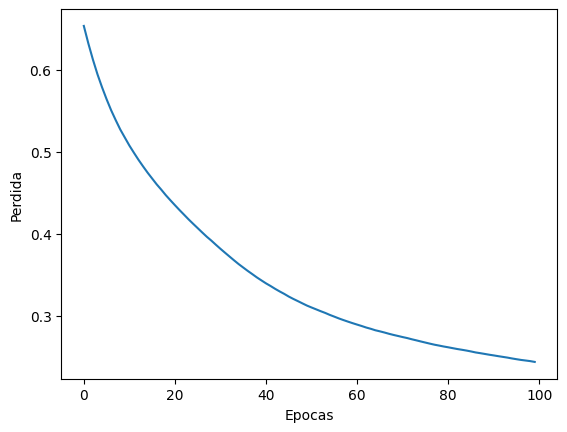

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import mlflow


mlflow.tensorflow.autolog()


with mlflow.start_run():
    input_shape = X_train_scaled.shape[1]

    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(16, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="binary_crossentropy",
        metrics=[tf.keras.metrics.AUC(name="auc"), "accuracy"]
    )


    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_test_scaled, y_test),
        epochs=100,
        batch_size=256,
        verbose=2
    )

    import matplotlib.pyplot as plt
    plt.xlabel("Epocas")
    plt.ylabel("Perdida")
    plt.plot(history.history["loss"], label="loss")

    # Guardar la grafica como artefacto de MLflow
    plt.savefig("training_loss.png")
    mlflow.log_artifact("training_loss.png")


In [ ]:
#Evaluar modelo

eval = model.evaluate(X_test, y_test, verbose=0)
print("loss, AUC, Acc:", eval) # Loss: Perdida, AUC: Area bajo la curva, Acc: Exactitud


Val loss, AUC, Acc: [0.36629632115364075, 0.92791748046875, 0.829383909702301]


In [34]:
# Exportar los resultados
experiment_id = mlflow.get_experiment_by_name("mlflow-tracking-experiment").experiment_id

runs = mlflow.search_runs(experiment_ids=[experiment_id])

#imprimir solo las columnas que necesitamos
display(runs[["run_id", "status", "start_time", "end_time", "metrics.accuracy", "tags.mlflow.runName"]])


# Quitar información de zona horaria antes de exportar 
for col in runs.select_dtypes(include=["datetimetz"]).columns:
    runs[col] = runs[col].dt.tz_localize(None)
    
runs.to_excel("Capturas\mlflow_experiment_results.xlsx")

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Isaac\AppData\Local\Temp\ipykernel_2028\437919168.py:14: SyntaxWarning: invalid escape sequence '\m'
  runs.to_excel("Capturas\mlflow_experiment_results.xlsx")


,run_id,status,start_time,end_time,metrics.accuracy,tags.mlflow.runName
0,c2d7562c6db548628e1edda030d93f95,FINISHED,2025-11-04 17:57:35.130000+00:00,2025-11-04 17:59:09.906000+00:00,0.906398,bedecked-bug-244
1,ca771158da5b401a9c213ec9aee3b32c,FINISHED,2025-11-04 17:50:21.127000+00:00,2025-11-04 17:50:43.593000+00:00,0.857820,trusting-shoat-434
2,5f0c366642a84f85b41a9337099892bc,FINISHED,2025-11-04 17:50:04.067000+00:00,2025-11-04 17:50:21.091000+00:00,0.853081,placid-pug-749
3,ac018581475d48e98852e2280935005a,FINISHED,2025-11-04 17:49:47.748000+00:00,2025-11-04 17:50:03.984000+00:00,0.843602,clean-stag-39
4,aa9afa1c90e14b91b61433de2f1f2677,FINISHED,2025-11-04 17:49:32.629000+00:00,2025-11-04 17:49:47.716000+00:00,0.853081,angry-gnu-357
5,0daf159a95ff4daeaabff7f8a9986cb0,FINISHED,2025-11-04 17:49:18.920000+00:00,2025-11-04 17:49:32.597000+00:00,0.872038,rumbling-shad-554
6,2c32ed391ad6433ab467d74bcf543550,FINISHED,2025-11-04 17:49:06.958000+00:00,2025-11-04 17:49:18.892000+00:00,0.853081,handsome-pug-687
7,39a5b749c0114a0e9909291495fd357f,FINISHED,2025-11-04 17:48:53.990000+00:00,2025-11-04 17:49:06.916000+00:00,0.857820,awesome-wren-883
8,53696e8489a04718a164c8c968864630,FINISHED,2025-11-04 17:48:40.537000+00:00,2025-11-04 17:48:53.972000+00:00,0.857820,nebulous-duck-958
9,25d4d09b388f477a8f7aab6a6af5ffa9,FINISHED,2025-11-04 17:48:24.516000+00:00,2025-11-04 17:48:40.509000+00:00,0.857820,shivering-jay-193


In [ ]:
# Hacerle una pregunta a ollama y registrarla como artefacto
import ollama

prompt ="¿Qué significa obtener un F1-score de 0.90? \n ¿Por qué una red neuronal podría tener mejor recall que una regresión logística? \n ¿Qué significa el activation=relu en una red neuronal?"

options = {"num_predict": 500, "temperature": 0.5, "top_p": 0.9}

result = ollama.generate(model="gemma3:1b", prompt=prompt, options=options)

# Guardar la respuesta en un archivo local y luego registrar ese archivo como artefacto en MLflow.
# mlflow.log_artifact espera una ruta de archivo local, no el contenido directamente.
filename = "result.txt"
with open(filename, "w", encoding="utf-8") as f:
	f.write(result.response)
 
mlflow.start_run(run_name="ollama-preguntas")
mlflow.log_artifact(filename)
mlflow.end_run()

print(result.response)

Vamos a desglosar cada uno de estos puntos, explicando qué significa obtener un F1-score de 0.90, por qué una red neuronal podría tener mejor recall que regresión logística, y qué significa el activation=relu en una red neuronal.

**1. ¿Qué significa obtener un F1-score de 0.90?**

Un F1-score (F1-score) es una métrica de evaluación que combina la precisión y el recall.  En términos sencillos, mide qué tan bien tu modelo predice los resultados correctos en comparación con todos los resultados posibles.  Un F1-score de 0.90 significa que el modelo está haciendo un trabajo *excelente*.  Esto indica que:

* **Precisión:** El modelo está prediciendo correctamente la mayoría de los casos.
* **Recall:** El modelo está identificando la mayoría de los casos positivos (los casos que realmente son positivos) en comparación con todos los casos reales.

Un F1-score de 0.90 es *muy bueno* en este sentido.  Significa que el modelo está superando las expectativas en términos de precisión y recall.  E

In [14]:
#Ejecutar runs aninadas 
params = {
    'C': [0.1, 1, 10],
    'max_iter': [100, 200, 300],
    'solver': ['liblinear', 'lbfgs']
}

with mlflow.start_run(run_name='runs_aninadas') as parent_run:
    for C in params['C']:
        for max_iter in params['max_iter']:
            for solver in params['solver']:
                with mlflow.start_run(run_name=f"child_C{C}_iter{max_iter}_{solver}", nested=True) as run:
                    lr = LogisticRegression(C=C, max_iter=max_iter, solver=solver)
                    lr.fit(X_train, y_train)
                    y_pred = lr.predict(X_test)

                    accuracy = accuracy_score(y_test, y_pred)
                    precision = precision_score(y_test, y_pred)
                    recall = recall_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred)

                    mlflow.log_param('C', C)
                    mlflow.log_param('max_iter', max_iter)
                    mlflow.log_param('solver', solver)
                    mlflow.log_metric('accuracy', accuracy)
                    mlflow.log_metric('precision', precision)
                    mlflow.log_metric('recall', recall)
                    mlflow.log_metric('f1', f1)
                    mlflow.sklearn.log_model(lr, "model")

                    print("Child Run ID:", run.info.run_id)
                print(f'Finished C={C}, max_iter={max_iter}, solver={solver}')

print("Parent Run ID:", parent_run.info.run_id)
    

2025/11/04 14:08:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/04 14:08:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\Isaac\Desktop\taller-mlflow-tracking\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/11/04 14:08:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Ple

Child Run ID: 04a7524aab534b71aa46b5f2ec315159
Finished C=0.1, max_iter=100, solver=liblinear


2025/11/04 14:08:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/04 14:08:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Child Run ID: dd174bc64e0e406ea8542b6ed5862aed
Finished C=0.1, max_iter=100, solver=lbfgs


2025/11/04 14:09:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\Isaac\Desktop\taller-mlflow-tracking\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/11/04 14:09:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Child Run ID: 3c314f6cf2df4159a6bb13bb6a5c2d60
Finished C=0.1, max_iter=200, solver=liblinear


2025/11/04 14:09:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/04 14:09:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Child Run ID: eaf19b35f9574ea692f7208d519e1aac
Finished C=0.1, max_iter=200, solver=lbfgs


2025/11/04 14:09:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/04 14:09:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Child Run ID: c2ee36d6f654467c97a5764ef9acc7a4
Finished C=0.1, max_iter=300, solver=liblinear


2025/11/04 14:09:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/04 14:09:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Child Run ID: ca01b7370f294927b95931aee12a137e
Finished C=0.1, max_iter=300, solver=lbfgs


2025/11/04 14:09:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\Isaac\Desktop\taller-mlflow-tracking\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/11/04 14:09:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Child Run ID: a8e3a6f6488d4b0495d4c1259280c68e
Finished C=1, max_iter=100, solver=liblinear


2025/11/04 14:09:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/04 14:09:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Child Run ID: fd66742d3d354d1cadc902975f2a40fc
Finished C=1, max_iter=100, solver=lbfgs


2025/11/04 14:09:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\Isaac\Desktop\taller-mlflow-tracking\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/11/04 14:09:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Child Run ID: 80e26c8a8c694c38969fa07c145202c7
Finished C=1, max_iter=200, solver=liblinear


2025/11/04 14:09:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/04 14:09:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Child Run ID: 0b03f32a4bb64d00acb5cbf5d8b0b3ec
Finished C=1, max_iter=200, solver=lbfgs


2025/11/04 14:09:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\Isaac\Desktop\taller-mlflow-tracking\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/11/04 14:09:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Child Run ID: 78f8768896024afaa0d0dfa2b6e3e9bb
Finished C=1, max_iter=300, solver=liblinear


2025/11/04 14:09:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/04 14:09:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Child Run ID: 5ec137be25b44a36afff3dcb7720de2a
Finished C=1, max_iter=300, solver=lbfgs


2025/11/04 14:10:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\Isaac\Desktop\taller-mlflow-tracking\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/11/04 14:10:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Child Run ID: d68ef4595a664cb9abbe46a55d33d985
Finished C=10, max_iter=100, solver=liblinear


2025/11/04 14:10:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/04 14:10:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Child Run ID: 82099c07f94043fcb68871824a68344a
Finished C=10, max_iter=100, solver=lbfgs


2025/11/04 14:10:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\Isaac\Desktop\taller-mlflow-tracking\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/11/04 14:10:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Child Run ID: d9073057704f4dc2874f86ccf7ff96a5
Finished C=10, max_iter=200, solver=liblinear


2025/11/04 14:10:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/04 14:10:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Child Run ID: 53b416d5b6f64cfcab206f42762f0e4c
Finished C=10, max_iter=200, solver=lbfgs


2025/11/04 14:10:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\Isaac\Desktop\taller-mlflow-tracking\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/11/04 14:10:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Child Run ID: ded9abb38f9d434e9a604370ef793cdf
Finished C=10, max_iter=300, solver=liblinear


2025/11/04 14:10:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Child Run ID: 443a4cc40bba4f508ab2da558bc2caaf
Finished C=10, max_iter=300, solver=lbfgs
Parent Run ID: 4cb3ade50c354fc59e9ab1e000439153
